In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean the data by removing top and bottom 2.5%
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

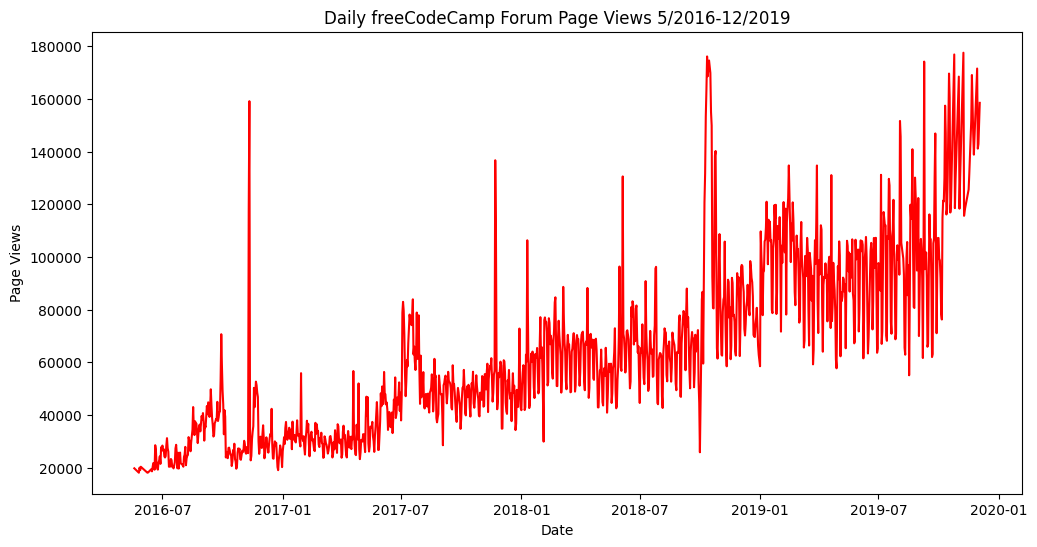

In [3]:
def draw_line_plot():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], color='red')

    # Set the title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save the figure
    plt.savefig('line_plot.png')
    return plt.gca()

# Draw the line plot
draw_line_plot()


<Axes: title={'center': 'Average daily page views per month'}, xlabel='Years', ylabel='Average Page Views'>

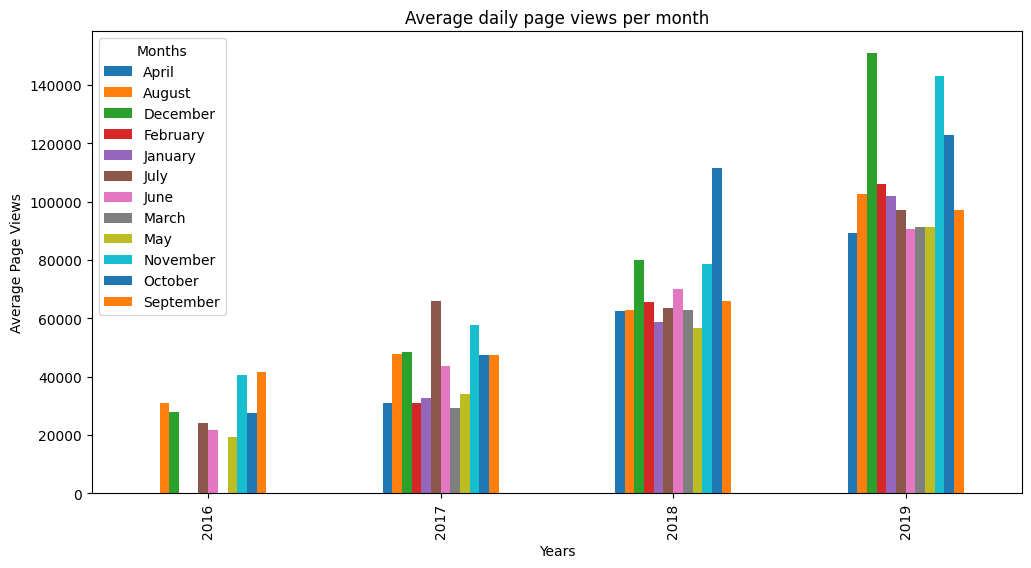

In [4]:
def draw_bar_plot():
    # Prepare data for bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plot
    df_bar_grouped.plot(kind='bar', figsize=(12, 6))
    plt.title('Average daily page views per month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', loc='upper left')

    # Save the figure
    plt.savefig('bar_plot.png')
    return plt.gca()

# Draw the bar plot
draw_bar_plot()


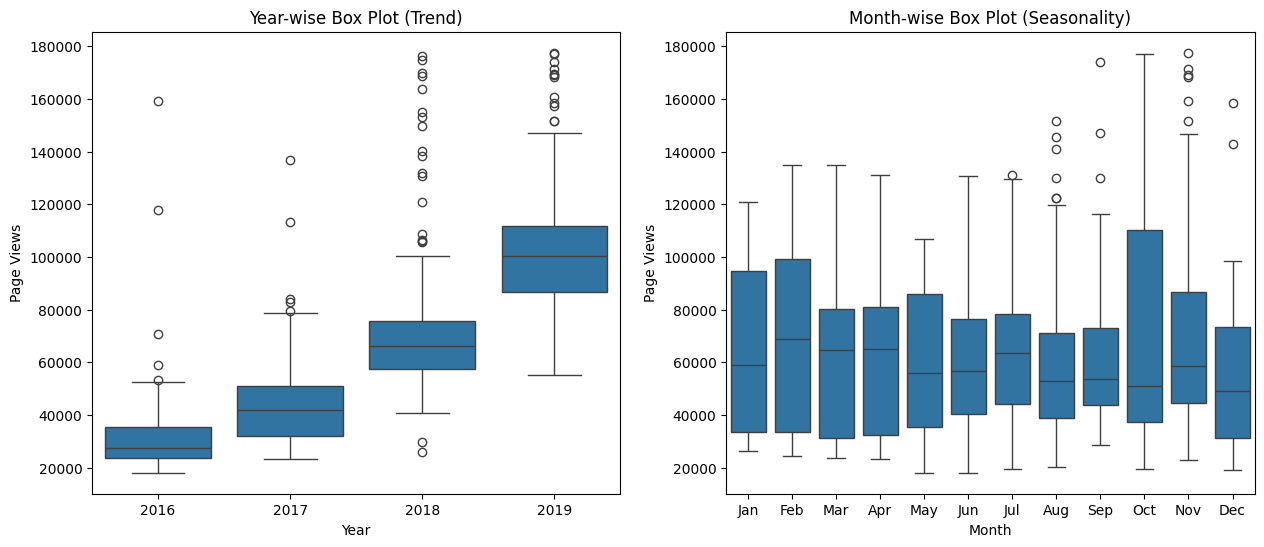

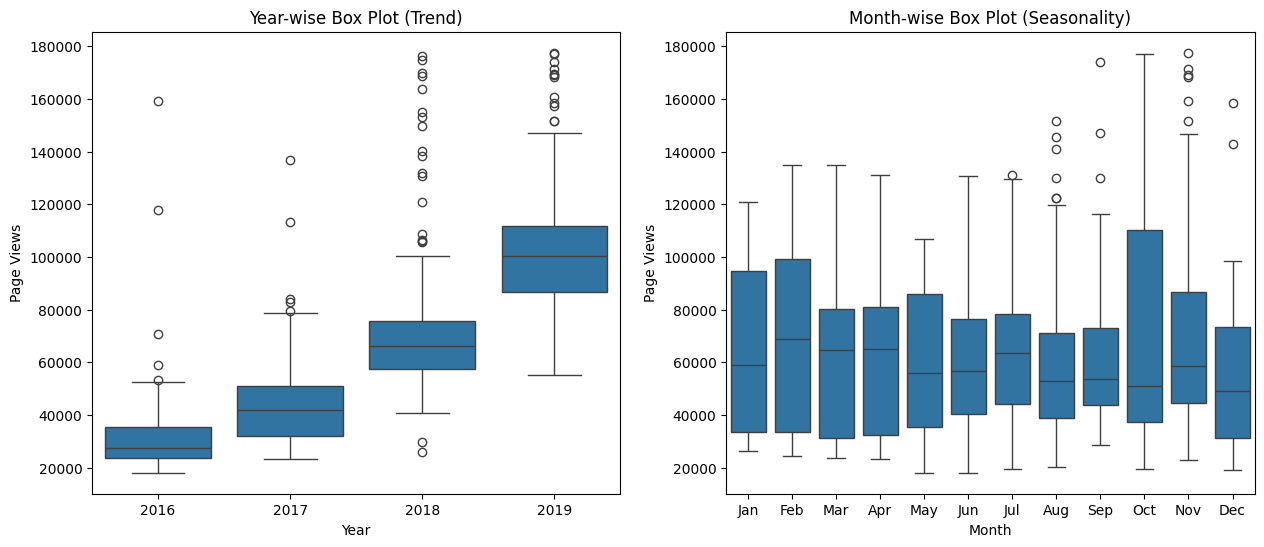

In [5]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.strftime('%b')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Year-wise box plot (trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    # Month-wise box plot (seasonality)
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2,
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save the figure
    fig.savefig('box_plot.png')
    return fig

# Draw the box plot
draw_box_plot()
